# import pandas

In [1]:
import pandas as pd
from tresboncoin.fuzzy_match import fuzzy_match_one
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Fuzzy match

In [2]:
X_input = pd.DataFrame({'uniq_id': ["id"],
                        'brand': [None],
                        'model': [None],
                        'title': ["yamaha"],
                        'price': [4500],
                        'mileage': [5002],
                        'bike_year': [2010],
                        'engine_size': [250]})
X_pred = pd.DataFrame(
    {'uniq_id': ['ERT34983'],
     'brand': [None],
     'model': [None],
     'title': ['Doucati Monster'],
     'price': [4500],
     'mileage': [5002],
     'bike_year': [2010],
     'engine_size': [None]})

In [3]:
fuzzy_match_one(X_pred)

,uniq_id,price,mileage,bike_year,engine_size,brand,model,brand_db,model_db,category_db,engine_size_db,power_db
0,ERT34983,4500,5002,2010,None,ducati,monster696,ducati,monster696,naked bike,696.0,78.9


# Bikez

In [4]:
bikez = pd.read_csv("../../tresboncoin/data/master_vehicule_list/bikez.csv")

In [5]:
bikez.head(1)

,brand_db,model_db,model_inv_db,model_submodel_db,model_submodel_inv_db,year_db,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db,model_size_db,model_size_inv_db
0,ajs,model8,model8,model8350,3508model,1962,sport,single cylinder,348.0,21.0,NaN,7.5:1,Air,153.0,0.1373,model8348,model8348


# brands dataset

In [6]:
ebay_db = pd.read_csv("../../tresboncoin/data/March_2021_MPSOV.csv")

In [7]:
brands_full = ebay_db["Make"].apply(lambda x: x.lower())
brands_full = pd.DataFrame(brands_full).drop_duplicates().reset_index(drop=True)

In [8]:
fo_brands = ["AC EMOTION", "ACCESS MOTOR", "APRILIA", "ARCTIC CAT", "BENELLI", "BETA", "BIMOTA", "BMW",
             "BUELL", "CAN-AM", "CF MOTO", "DAELIM", "DERBI", "DUCATI", "FANTIC", "FB MONDIAL", "GAS GAS", 
             "GENERIC", "GILERA", "HARLEY DAVIDSON", "HARLEY-DAVIDSON", "HER CHEE", "HM", "HONDA", "HONGYI",
             "HUSQVARNA", "HYOSUNG", "HYTRACK", "IMF scooter", "INDIAN", "IRBIT", "JM MOTORS", "JORDON", "JOTAGAS",
             "KAWASAKI", "KEEWAY", "KSR MOTO", "KTM", "KYMCO", "LAMBRETTA", "LAZIO", "LIGIER", "LINHAI", "LONGJIA",
             "Magnum", "MAGPOWER", "MALAGUTI", "MARTIN", "MASAI", "MASH", "MBK", "MOTO MORINI", "MOTO-GUZZI", 
             "MOTOCONFORT", "MOTRAC", "MV AGUSTA", "NECO", "NIU", "NORTON", "ORCAL", "PEUGEOT", "PIAGGIO", "POLARIS",
             "QUADDY", "QUADRO", "RIEJU", "RIVAL MOTORS", "RIYA", "ROYAL ENFIELD", "SHERCO", "SUPER SOCO", "SUZUKI",
             "SVM (SWM)", "SWM", "SYM", "TGB", "TNT MOTOR", "TRIUMPH", "VASTRO", "VESPA", "Victory Motorcycle",
             "VOGE", "VOXAN", "WANGYE", "XINGYUE", "YAMAHA", "ZERO MOTORCYCLES"]
fo_brands = list(pd.Series(fo_brands).apply(lambda x: x.lower()))

In [9]:
mp_brands = ["Aprilia", "Benelli", "Beta", "Bimota", "BMW", "Buell", "CF MOTO", "Daelim", "Ducati", "Fantic",
             "FB Mondial", "Gas Gas", "Gilera", "Harley-Davidson", "Honda", "Husqvarna", "Hyosung", "Indian",
             "Kawasaki", "KTM", "Kymco", "Magpower", "Malaguti", "Mash", "Moto-Guzzi", "MV-Agusta", "Orcal",
             "Rieju", "Royal-Enfield", "Sherco", "Suzuki", "SWM", "Sym", "Triumph", "Voxan", "Yamaha"]
mp_brands = list(pd.Series(mp_brands).apply(lambda x: x.lower()))

In [10]:
brands_df = list(brands_full["Make"]) + fo_brands + mp_brands

# Loading datasets

In [11]:
!ls ../../tresboncoin/data/master_vehicule_list/

bikez.csv   ebay_db.csv


In [12]:
!ls ../../tresboncoin/data/

March_2021_MPSOV.csv                  log_pv.csv
as24                                  master
as_24_annonces_full.csv               master_vehicule_list
as_24_annonces_full_url_be.csv        master_with_fuzzy_and_cleaning.csv
data_full.csv                         master_with_fuzzy_and_cleaning_v2.csv
data_full_BE.csv                      moto-occasion
ebay_moto_database.csv                moto-occasion.csv
fulloccaz                             moto-selection
fulloccaz.csv                         moto-selection.csv
lacentrale.csv                        motoplanete
lacentrale_old.csv                    motoplanete.csv
log_fulloccaz.csv                     paruvendu
log_motoplanete.csv                   scraping_outputs


In [13]:
data_motoplanete = pd.read_csv("../../tresboncoin/data/motoplanete.csv")
data_fulloccaz = pd.read_csv("../../tresboncoin/data/fulloccaz.csv")
data_motooccasion = pd.read_csv("../../tresboncoin/data/moto-occasion.csv")
data_motoselection = pd.read_csv("../../tresboncoin/data/moto-selection.csv")
data_auto_scout_24 = pd.read_csv("../../tresboncoin/data/as_24_annonces_full.csv")
data_auto_scout_24_BE = pd.read_csv("../../tresboncoin/data/as_24_annonces_full_url_be.csv")

# features engineering

In [14]:
def set_brand_and_model(df, feature_name, r=brands_df):
        
    # init var
    brand_list = [np.nan] * df.shape[0]
    model_list = [np.nan] * df.shape[0]
    
    # set brands to lower
    df[feature_name] = df[feature_name].apply(lambda x: x.lower())
    
    # find brand
    for k in range(df.shape[0]):
        val = df[feature_name].iloc[k]
        for brand in r:
            if val.find(brand) >= 0:
                brand_list[k] = brand.strip()
                model_list[k] = val.replace(brand.strip(), "").strip()
    df["Brand"] = pd.Series(brand_list)
    df["Model"] = pd.Series(model_list)
    
    return df

## On motoplanete

In [15]:
data_motoplanete.shape

(3703, 17)

In [16]:
data_motoplanete = data_motoplanete[~data_motoplanete["engine capacity [CC]"].isnull()]

In [17]:
data_motoplanete["vehicle release date"] = pd.to_datetime(data_motoplanete["vehicle release date"])
data_motoplanete["vehicle release date"] = data_motoplanete["vehicle release date"].apply(lambda x: int(x.strftime("%Y")))

### motoplanete brands and models

In [18]:
data_motoplanete["vehicle brand"] = data_motoplanete["vehicle brand"].apply(lambda x: str(x).lower())

In [19]:
data_motoplanete = set_brand_and_model(data_motoplanete, "vehicle brand")

In [20]:
data_motoplanete["uniq_id"] = data_motoplanete["unique id"].apply(lambda x: "motoplanete-" + str(x))

In [21]:
data_motoplanete.shape

(3701, 20)

## On Full Occaz

In [22]:
data_fulloccaz.shape

(5802, 21)

In [23]:
data_fulloccaz = data_fulloccaz[~data_fulloccaz["vehicle release date"].isnull()]

In [24]:
data_fulloccaz["vehicle release date"] = pd.to_datetime(data_fulloccaz["vehicle release date"])
data_fulloccaz["vehicle release date"] = data_fulloccaz["vehicle release date"].apply(lambda x: int(x.strftime("%Y")))

### fulloccaz brands and models

In [25]:
data_fulloccaz["vehicle brand"] = data_fulloccaz["vehicle brand"].apply(lambda x: str(x).lower())
data_fulloccaz = set_brand_and_model(data_fulloccaz, "vehicle brand")

In [26]:
data_fulloccaz["uniq_id"] = data_fulloccaz["unique id"].apply(lambda x: "fulloccaz-" + str(x))

In [27]:
data_fulloccaz.shape

(5765, 24)

## On Autoscout24

In [28]:
data_auto_scout_24.shape

(3278, 25)

In [29]:
data_auto_scout_24["model"] = data_auto_scout_24["model"].apply(lambda x: str(x).lower())

In [30]:
data_auto_scout_24 = set_brand_and_model(data_auto_scout_24, "model")

In [31]:
data_auto_scout_24["uniq_id"] = data_auto_scout_24["reference"].apply(lambda x: "autoscout24-" + str(x))

In [32]:
data_auto_scout_24["cylindree"] = data_auto_scout_24["cylindree"].apply(lambda x: float(str(x).replace(" cm³", "").replace(".", "")))

In [33]:
data_auto_scout_24["date_scrapped"] = datetime.now()

In [34]:
data_auto_scout_24.rename(columns={"model": "old_model"}, inplace=True)

In [35]:
data_auto_scout_24.shape

(3278, 29)

## On Autoscout24 BE

In [36]:
data_auto_scout_24_BE.shape

(5023, 25)

In [37]:
data_auto_scout_24_BE["model"] = data_auto_scout_24_BE["model"].apply(lambda x: str(x).lower())

In [38]:
data_auto_scout_24_BE = set_brand_and_model(data_auto_scout_24_BE, "model")

In [39]:
data_auto_scout_24_BE["uniq_id"] = data_auto_scout_24_BE["reference"].apply(lambda x: "autoscout24-BE-" + str(x))

In [40]:
data_auto_scout_24_BE["cylindree"] = data_auto_scout_24_BE["cylindree"].apply(lambda x: float(str(x).replace(" cm³", "").replace(".", "")))

In [41]:
data_auto_scout_24_BE["date_scrapped"] = datetime.now()

In [42]:
data_auto_scout_24_BE = data_auto_scout_24_BE[~data_auto_scout_24_BE["cylindree"].isnull()]

In [44]:
data_auto_scout_24_BE.shape

(2420, 29)

# Concatenation

In [45]:
concatenation_map = pd.DataFrame(dict({"site_name": ["motoplanete", "moto-occasion", "autoscout24", "fulloccaz", "moto-selection", "autoscout24_BE"], 
                                       "url": ["url", "url", "url", "url", "url", "url"],
                                       "uniq_id": ["uniq_id", "uniq_id", "uniq_id", "uniq_id", "uniq_id", "uniq_id"],
                                       "brand": ["Brand", "bike_brand", "Brand", "Brand", "bike_brand", "marque"],
                                       "bike_year": ["vehicle release date", "bike_year", "annee", "vehicle release date", "bike_year", "annee"],
                                       "mileage": ["mileage", "bike_km", "mileage", "mileage", "bike_km", "mileage"],
                                       "price": ["price", "price", "price", "price", "price", "price"],
                                       "bike_type": ["vehicle type", "bike_type", "carrosserie", "vehicle type", "bike_type", "carrosserie"],
                                       "model": ["Model", "bike_model", "Model", "Model", "bike_model", "model"],
                                       "engine_size": ["engine capacity [CC]", "bike_size", "cylindree", "engine capacity [CC]", "bike_size", "cylindree"],
                                       "date_scrapped": ["date_scrapped", "scrap_date", "date_scrapped", "date_scrapped", "scrap_date", "date_scrapped"]}))
#
df_ids = dict({"motoplanete": 0,
               "moto-occasion": 1,
               "autoscout24": 2,
               "fulloccaz": 3,
               "moto-selection": 4,
               "autoscout24_de": 5})
concatenation_map

,site_name,url,uniq_id,brand,bike_year,mileage,price,bike_type,model,engine_size,date_scrapped
0,motoplanete,url,uniq_id,Brand,vehicle release date,mileage,price,vehicle type,Model,engine capacity [CC],date_scrapped
1,moto-occasion,url,uniq_id,bike_brand,bike_year,bike_km,price,bike_type,bike_model,bike_size,scrap_date
2,autoscout24,url,uniq_id,Brand,annee,mileage,price,carrosserie,Model,cylindree,date_scrapped
3,fulloccaz,url,uniq_id,Brand,vehicle release date,mileage,price,vehicle type,Model,engine capacity [CC],date_scrapped
4,moto-selection,url,uniq_id,bike_brand,bike_year,bike_km,price,bike_type,bike_model,bike_size,scrap_date
5,autoscout24_BE,url,uniq_id,marque,annee,mileage,price,carrosserie,model,cylindree,date_scrapped


In [46]:
def set_colums(df_, dict_, sitename_):
    site_id = df_ids[sitename_]
    old_columns = list(dict_.iloc[site_id])
    new_columns = list(dict_.iloc[site_id].index)

    fd_new_columns = []
    
    for k in df_.columns:
        if k in old_columns:
            line_id = old_columns.index(k)
            fd_new_columns.append(new_columns[line_id])
        else:
            fd_new_columns.append(k)
    return fd_new_columns

In [47]:
data_motoplanete.columns = set_colums(data_motoplanete, concatenation_map, "motoplanete")
data_fulloccaz.columns = set_colums(data_fulloccaz, concatenation_map, "fulloccaz")
data_motooccasion.columns = set_colums(data_motooccasion, concatenation_map, "moto-occasion")
data_motoselection.columns = set_colums(data_motoselection, concatenation_map, "moto-selection")
data_auto_scout_24.columns = set_colums(data_auto_scout_24, concatenation_map, "autoscout24")
data_auto_scout_24_BE.columns = set_colums(data_auto_scout_24_BE, concatenation_map, "autoscout24_de")

In [48]:
columns_to_keep = ["url", "uniq_id", "brand", "bike_year", "mileage", "bike_type", "price", "model", "engine_size", "date_scrapped"]

In [49]:
df_motoplanete_reduced = data_motoplanete[columns_to_keep]
df_fulloccaz_reduced = data_fulloccaz[columns_to_keep]
df_motooccasion_reduced = data_motooccasion[columns_to_keep]
df_motoselection_reduced = data_motoselection[columns_to_keep]
df_auto_scout_24_reduced = data_auto_scout_24[columns_to_keep]
#df_auto_scout_24_BE_reduced = data_auto_scout_24_BE[columns_to_keep]
#
# concatenation
data = pd.concat([df_motoplanete_reduced,
                  df_fulloccaz_reduced,
                  df_motooccasion_reduced,
                  df_motoselection_reduced,
                  df_auto_scout_24_reduced
                  #df_auto_scout_24_BE_reduced
                 ], axis=0, ignore_index=True)

# data eng on dataframe

In [50]:
data.head()

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,2021,476.0,Trail,16999.0,versys 1000 2020,1000.0,2021/06/04 - 22h18
1,https://www.motoplanete.com/occasion-moto/2127...,motoplanete-21278,yamaha,2003,5130.0,Custom,3700.0,wild star 2003,1600.0,2021/06/04 - 22h18
2,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken 2019,847.0,2021/06/04 - 22h18
3,https://www.motoplanete.com/occasion-moto/3923...,motoplanete-39239,bmw,2021,998.0,Roadster,13990.0,r ninet pure 2021,1200.0,2021/06/04 - 22h18
4,https://www.motoplanete.com/occasion-moto/1536...,motoplanete-15360,yamaha,2016,2600.0,Custom,8500.0,xv 950 bolt 2016,950.0,2021/06/04 - 22h18


# cleaning data

In [51]:
data["model"].isnull().sum()

626

In [52]:
100 * data.isnull().sum().sort_values(ascending=False)/len(data)
data.isnull().sum()

url                6
uniq_id            0
brand            626
bike_year          0
mileage           84
bike_type        424
price              0
model            626
engine_size      389
date_scrapped      0
dtype: int64

In [53]:
data["brand"] = data["brand"].apply(lambda x: str(x).lower())

In [54]:
data.shape

(20989, 10)

In [55]:
data = data[data["bike_year"] != "['']"]
data["bike_year"] = data["bike_year"].apply(lambda x: int(x))
data = data[data["bike_year"] >= 1900]

In [56]:
data = data[~data["model"].isnull()]
data = data[~data["mileage"].isnull()]

In [57]:
100 * data.isnull().sum().sort_values(ascending=False)/len(data)
data.isnull().sum()

url                6
uniq_id            0
brand              0
bike_year          0
mileage            0
bike_type        392
price              0
model              0
engine_size      340
date_scrapped      0
dtype: int64

In [58]:
data.shape

(20298, 10)

# Saving to CSV

In [59]:
data.to_csv(path_or_buf="../../tresboncoin/data/data_full.csv", index=False)

# Visu data

In [77]:
#data.describe

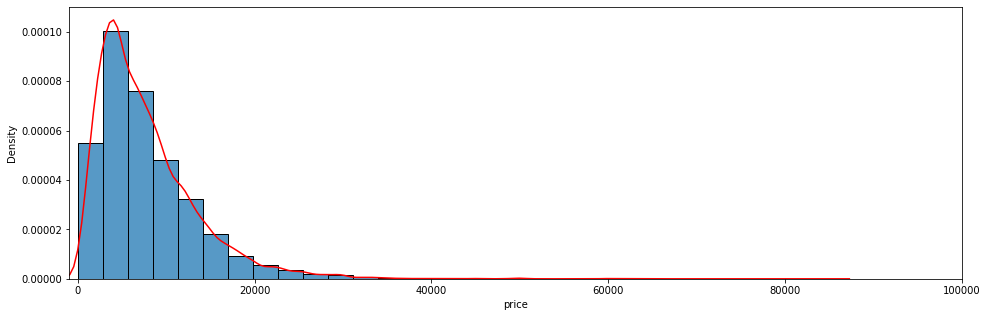

In [78]:
fig = plt.figure(figsize=(16, 5))
feat = "price"
sns.histplot(data[feat], palette='Blues', stat='density', bins=30)
sns.kdeplot(data[feat], color='red')
plt.xlim(-1000, 100000);

In [79]:
data[feat].mean()

7746.5950979567815

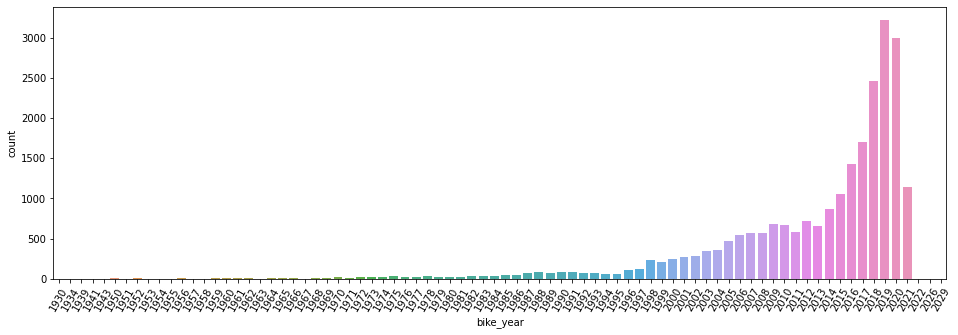

In [80]:
fig = plt.figure(figsize=(16, 5))
sns.countplot(data=data.sort_values(by="bike_year", ascending=True), x="bike_year")
plt.xticks(rotation=60);

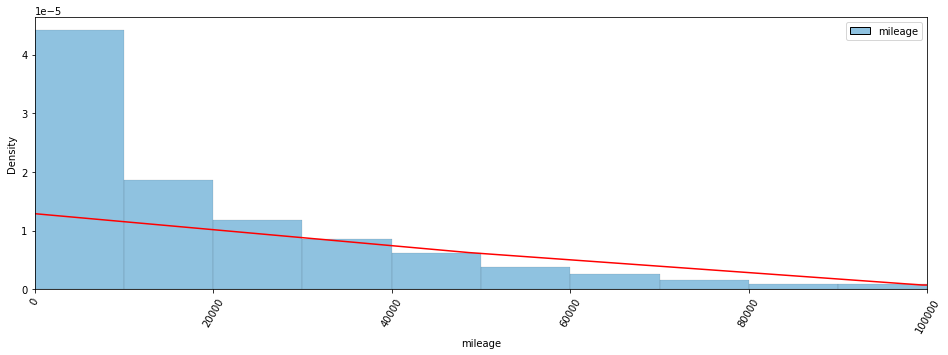

In [81]:
fig = plt.figure(figsize=(16, 5))
#plt.hist(data["mileage"], bins=1000)
sns.histplot(data[["mileage"]], palette='Blues', stat='density', bins=1000)
sns.kdeplot(data["mileage"], color='red')
plt.xticks(rotation=60);
plt.xlim(0, 100000);

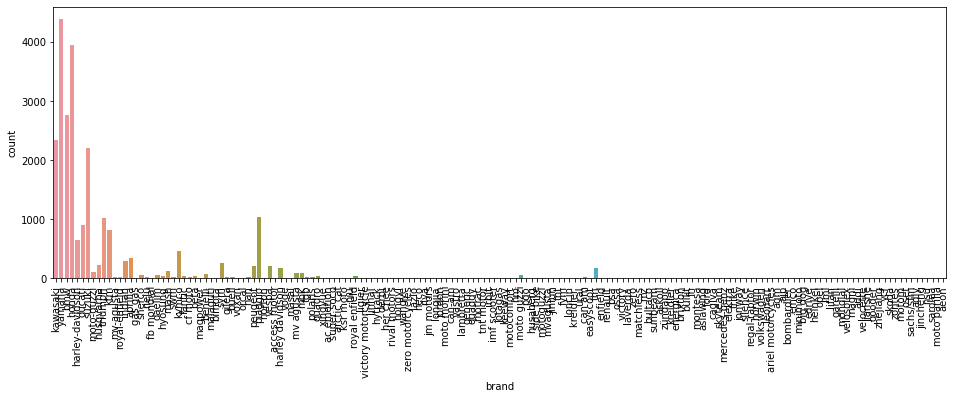

In [82]:
fig = plt.figure(figsize=(16, 5))
sns.countplot(data=data, x="brand")
plt.xticks(rotation=90);

In [83]:
#pd.DataFrame(data["brand"].value_counts()).head(50)

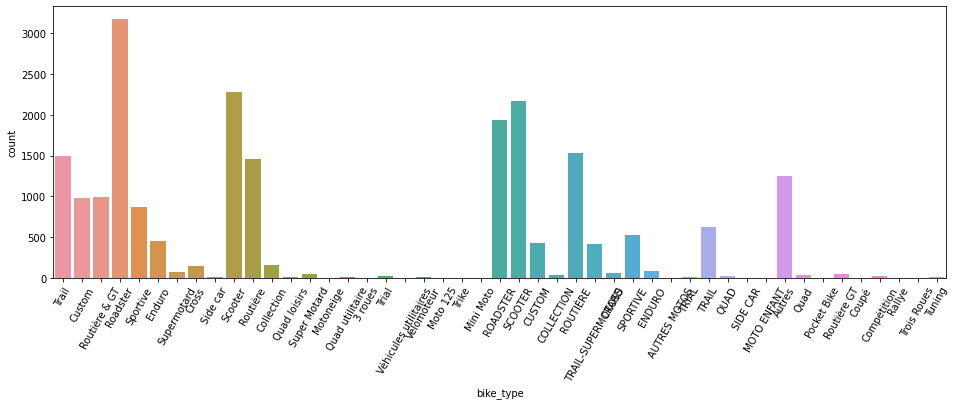

In [84]:
fig = plt.figure(figsize=(16, 5))
sns.countplot(data=data, x="bike_type")
plt.xticks(rotation=60);